# Stock Data Analysis

In [26]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import numpy.polynomial.polynomial as poly

In [3]:
# Data sourced from:
# https://api.iextrading.com/1.0/stock/amzn/chart/5y

### Load the data you receive into a Pandas DataFrame

In [6]:
# Read in data from JSON file previsously downloaded
df = pd.read_json('./amzn_5yr_data.json')

### Show the first 5 rows of the dataset

In [5]:
df.head(5)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,8.31,0.000000,2.144,395.96,2013-12-18,396.3000,"Dec 18, 13",383.10,389.23,3493635,3493635,390.0149
1,-0.77,-0.001945,-0.194,395.19,2013-12-19,397.2900,"Dec 19, 13",392.60,394.27,2429598,2429598,395.3560
2,7.01,0.015759,1.774,402.20,2013-12-20,404.7200,"Dec 20, 13",395.78,396.55,5038537,5038537,401.1329
3,0.72,0.017578,0.179,402.92,2013-12-23,405.0000,"Dec 23, 13",399.20,403.69,2661823,2661823,402.2857
4,-3.72,0.008183,-0.923,399.20,2013-12-24,403.7249,"Dec 24, 13",396.37,402.52,1380373,1380373,399.4538


### Show the description and the info of the data set

In [9]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.900843,1.059966,0.127112,815.664118,823.903690,806.817366,816.210250,4.186478e+06,4.186478e+06,815.590399
std,18.302335,1.200044,1.923018,475.169282,480.799525,469.497317,476.111014,2.364444e+06,2.364444e+06,475.352043
min,-139.360000,-0.275306,-10.997000,286.950000,290.420000,284.000000,284.400000,1.092970e+06,1.092970e+06,287.995100
25%,-4.440000,-0.005379,-0.700250,393.830000,397.585000,388.105000,393.702500,2.704298e+06,2.704298e+06,391.968500
50%,0.735000,0.816307,0.115500,719.185000,723.395000,713.036600,717.785000,3.562152e+06,3.562152e+06,718.636400
75%,6.997500,1.516416,1.069750,996.400000,1004.815000,991.895000,999.867500,4.808373e+06,4.808373e+06,997.215700
max,128.520000,4.150798,14.131000,2039.510000,2050.500000,2013.000000,2038.110000,2.385606e+07,2.385606e+07,2034.750000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


### Ensure that the date column has been cast into a datetime object in your DataFrame

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Using a regression model, split your data into train and test data

In [20]:
X_full = df.date
Y_full = df.high
X_train, X_test, Y_test, Y_train = train_test_split(X_full, Y_full, test_size=0.5, random_state=42)

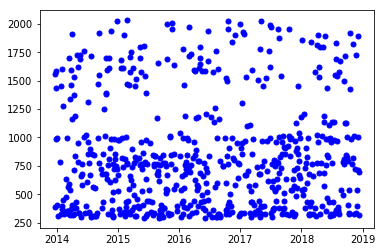

In [25]:
plt.plot(X_test, Y_test, 'bo', markersize=5)